<a href="https://colab.research.google.com/github/JRzo/Data_Analytics_Projects/blob/main/Sentiment_Analysis_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
We are creating a Sentiment Analysis on the social media X(Twitter)
The database comes from Kaggle: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis


"""

'\nWe are creating a Sentiment Analysis on the social media X(Twitter)\nThe database comes from Kaggle: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis\n\n\n'

In [67]:
!pip install demoji
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings

import demoji as dj
dj.download_codes()
from nltk.corpus import stopwords

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS


warnings.filterwarnings("ignore", category=DeprecationWarning)


# // Pre-Proccessing the data:
"""
Pre-Processing the data : We will remove duplicates,
Remove URL, @, # and special characters + Numbers.

Lower case all of the content and remove stop words.
"""


data = pd.read_csv("/content/twitter_validation.csv").drop_duplicates()
data.rename(columns={"3364": "ID", "Facebook": "Company",
                     "I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣": "Content"}, inplace=True)

data.info()

data.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          999 non-null    int64 
 1   Company     999 non-null    object
 2   Irrelevant  999 non-null    object
 3   Content     999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


<ipython-input-67-9ba41302b19c>:12: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  dj.download_codes()


,ID,Company,Irrelevant,Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
95,11687,Verizon,Negative,@verizon Can you waive some data overage charg...
96,1589,Battlefield,Negative,No one buy battlefield 3 on steam! It doesn’t ...
97,3526,Facebook,Neutral,Our #HISAPerth #OBIawards ceremony is taking p...
98,8174,Microsoft,Positive,#Indigo Urgent Care looks to Microsoft Teams a...


In [3]:
data["Content"] = data["Content"].apply(lambda l: re.sub('[^a-zA-Z \n\.]', " ", l))
data["Content"] = data["Content"].apply(lambda l: l.lower())
data["Content"] = data["Content"].apply(lambda l: l.translate(str.maketrans('', '', string.punctuation)))

data.head(100)

,ID,Company,Irrelevant,Content
0,352,Amazon,Neutral,bbc news amazon boss jeff bezos rejects clai...
1,8312,Microsoft,Negative,microsoft why do i pay for word when it funct...
2,4371,CS-GO,Negative,csgo matchmaking is so full of closet hacking ...
3,4433,Google,Neutral,now the president is slapping americans in the...
4,6273,FIFA,Negative,hi eahelp i ve had madeleine mccann in my cel...
...,...,...,...,...
95,11687,Verizon,Negative,verizon can you waive some data overage charg...
96,1589,Battlefield,Negative,no one buy battlefield on steam it doesn t ...
97,3526,Facebook,Neutral,our hisaperth obiawards ceremony is taking p...
98,8174,Microsoft,Positive,indigo urgent care looks to microsoft teams a...


In [4]:
# Remove stop words
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
data["Content"] = data["Content"].apply(lambda x: " ".join([w for w in x.split() if w not in stop_words]))

data.head(1000)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,ID,Company,Irrelevant,Content
0,352,Amazon,Neutral,bbc news amazon boss jeff bezos rejects claims...
1,8312,Microsoft,Negative,microsoft pay word functions poorly samsungus ...
2,4371,CS-GO,Negative,csgo matchmaking full closet hacking truly awf...
3,4433,Google,Neutral,president slapping americans face really commi...
4,6273,FIFA,Negative,hi eahelp madeleine mccann cellar past years l...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,toronto arts culture capital canada wonder wan...
995,4359,CS-GO,Irrelevant,actually good move tot bring viewers one peopl...
996,2652,Borderlands,Positive,today sucked time drink wine n play borderland...
997,8069,Microsoft,Positive,bought fraction microsoft today small wins


In [5]:
# Let's handle the emojis if any of the content area:

data["Content"] = data["Content"].apply(lambda x: dj.replace_with_desc(x))
data.head(1000)


,ID,Company,Irrelevant,Content
0,352,Amazon,Neutral,bbc news amazon boss jeff bezos rejects claims...
1,8312,Microsoft,Negative,microsoft pay word functions poorly samsungus ...
2,4371,CS-GO,Negative,csgo matchmaking full closet hacking truly awf...
3,4433,Google,Neutral,president slapping americans face really commi...
4,6273,FIFA,Negative,hi eahelp madeleine mccann cellar past years l...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,toronto arts culture capital canada wonder wan...
995,4359,CS-GO,Irrelevant,actually good move tot bring viewers one peopl...
996,2652,Borderlands,Positive,today sucked time drink wine n play borderland...
997,8069,Microsoft,Positive,bought fraction microsoft today small wins


In [6]:
"""
Using TextBlob which is a rule-based
 library that provides a polarity score for each text.

 -1 means very negative
 0 means neutral
 1 means very positive


"""

data["Score"] = data["Content"].apply(lambda x: TextBlob(x).sentiment.polarity)
data.head(1000)

,ID,Company,Irrelevant,Content,Score
0,352,Amazon,Neutral,bbc news amazon boss jeff bezos rejects claims...,0.000000
1,8312,Microsoft,Negative,microsoft pay word functions poorly samsungus ...,-0.400000
2,4371,CS-GO,Negative,csgo matchmaking full closet hacking truly awf...,-0.350000
3,4433,Google,Neutral,president slapping americans face really commi...,0.200000
4,6273,FIFA,Negative,hi eahelp madeleine mccann cellar past years l...,-0.218750
...,...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,toronto arts culture capital canada wonder wan...,0.233333
995,4359,CS-GO,Irrelevant,actually good move tot bring viewers one peopl...,0.183333
996,2652,Borderlands,Positive,today sucked time drink wine n play borderland...,-0.800000
997,8069,Microsoft,Positive,bought fraction microsoft today small wins,0.025000


<ipython-input-63-40f72b35904f>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Company_scores_good.values(), Company_scores_good.keys(), marker="D", cmap='plasma',


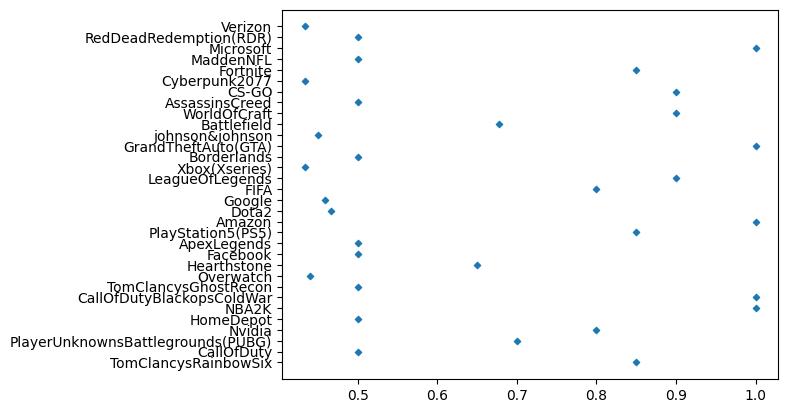

In [63]:
"""
# Evaluation & Analysis.
Which companies have a good/bad/neutral social media sentiment?


"""

Company_scores_good = dict(zip(data["Company"].loc[data["Score"] > 0.4], data["Score"].loc[data["Score"] > 0.4]))
Company_scores_good

plt.scatter(Company_scores_good.values(), Company_scores_good.keys(), marker="D", cmap='plasma',
            plotnonfinite=True, s=10, label="Good Companies", )
plt.show()


# Visualization showing the scatter plot of the good companies.

<ipython-input-62-7281fc848029>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Company_scores_bad.values(), Company_scores_bad.keys(), marker="D", cmap='plasma',


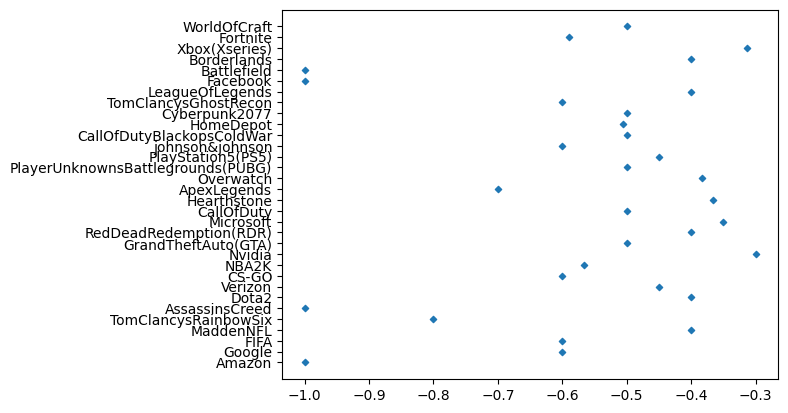

In [62]:
"""
Negative Companies + Visulaziation

"""

plt.scatter(Company_scores_bad.values(), Company_scores_bad.keys(), marker="D", cmap='plasma',
            plotnonfinite=True, s=10, label="Good Companies", )


Company_scores_bad = dict(zip(data["Company"].loc[data["Score"]> -0.3], data["Score"].loc[data["Score"] < -0.3]))
plt.show()

<ipython-input-65-7519f413dbcc>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Company_scores_neutral.values(), Company_scores_neutral.keys(), marker="D", cmap='plasma',


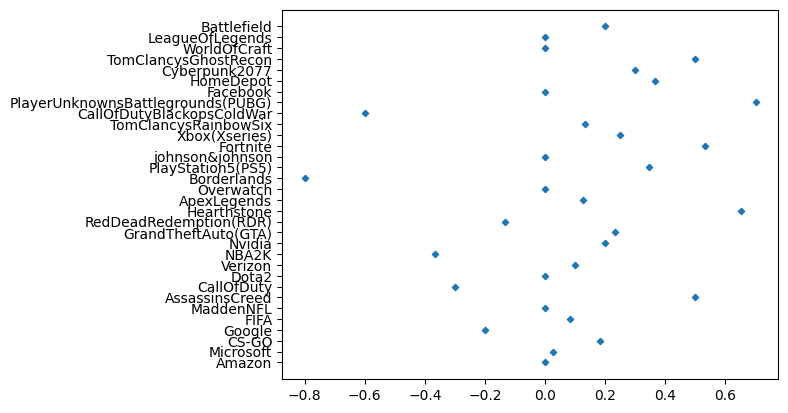

In [65]:
"""
Neutral Companies + Visualizaiton"""


Company_scores_neutral = dict(zip(data["Company"].loc[data["Score"] -0.3 < 0.4], data["Score"].loc[data["Score"]-0.3 < 0.4] ))
plt.scatter(Company_scores_neutral.values(), Company_scores_neutral.keys(), marker="D", cmap='plasma',
            plotnonfinite=True, s=10, label="Good Companies", )

plt.show()


In [66]:
"""
Which company is the best/worst in terms of social media sentiment?
What is the average a company should target for social media sentiment?
"""

best_company = max(Company_scores_good, key=Company_scores_good.get)
worst_company = min(Company_scores_bad, key=Company_scores_bad.get)
average_company = sum(Company_scores_good.values())  / len(Company_scores_good)

print(f"Best Company ==> {best_company}")
print(f"Worst Company ==> {worst_company}")
print(f"What is an average score the any company should aim ==> {average_company}")

Best Company ==> NBA2K
Worst Company ==> Amazon
What is an average score the any company should aim ==> 0.6716493055555556


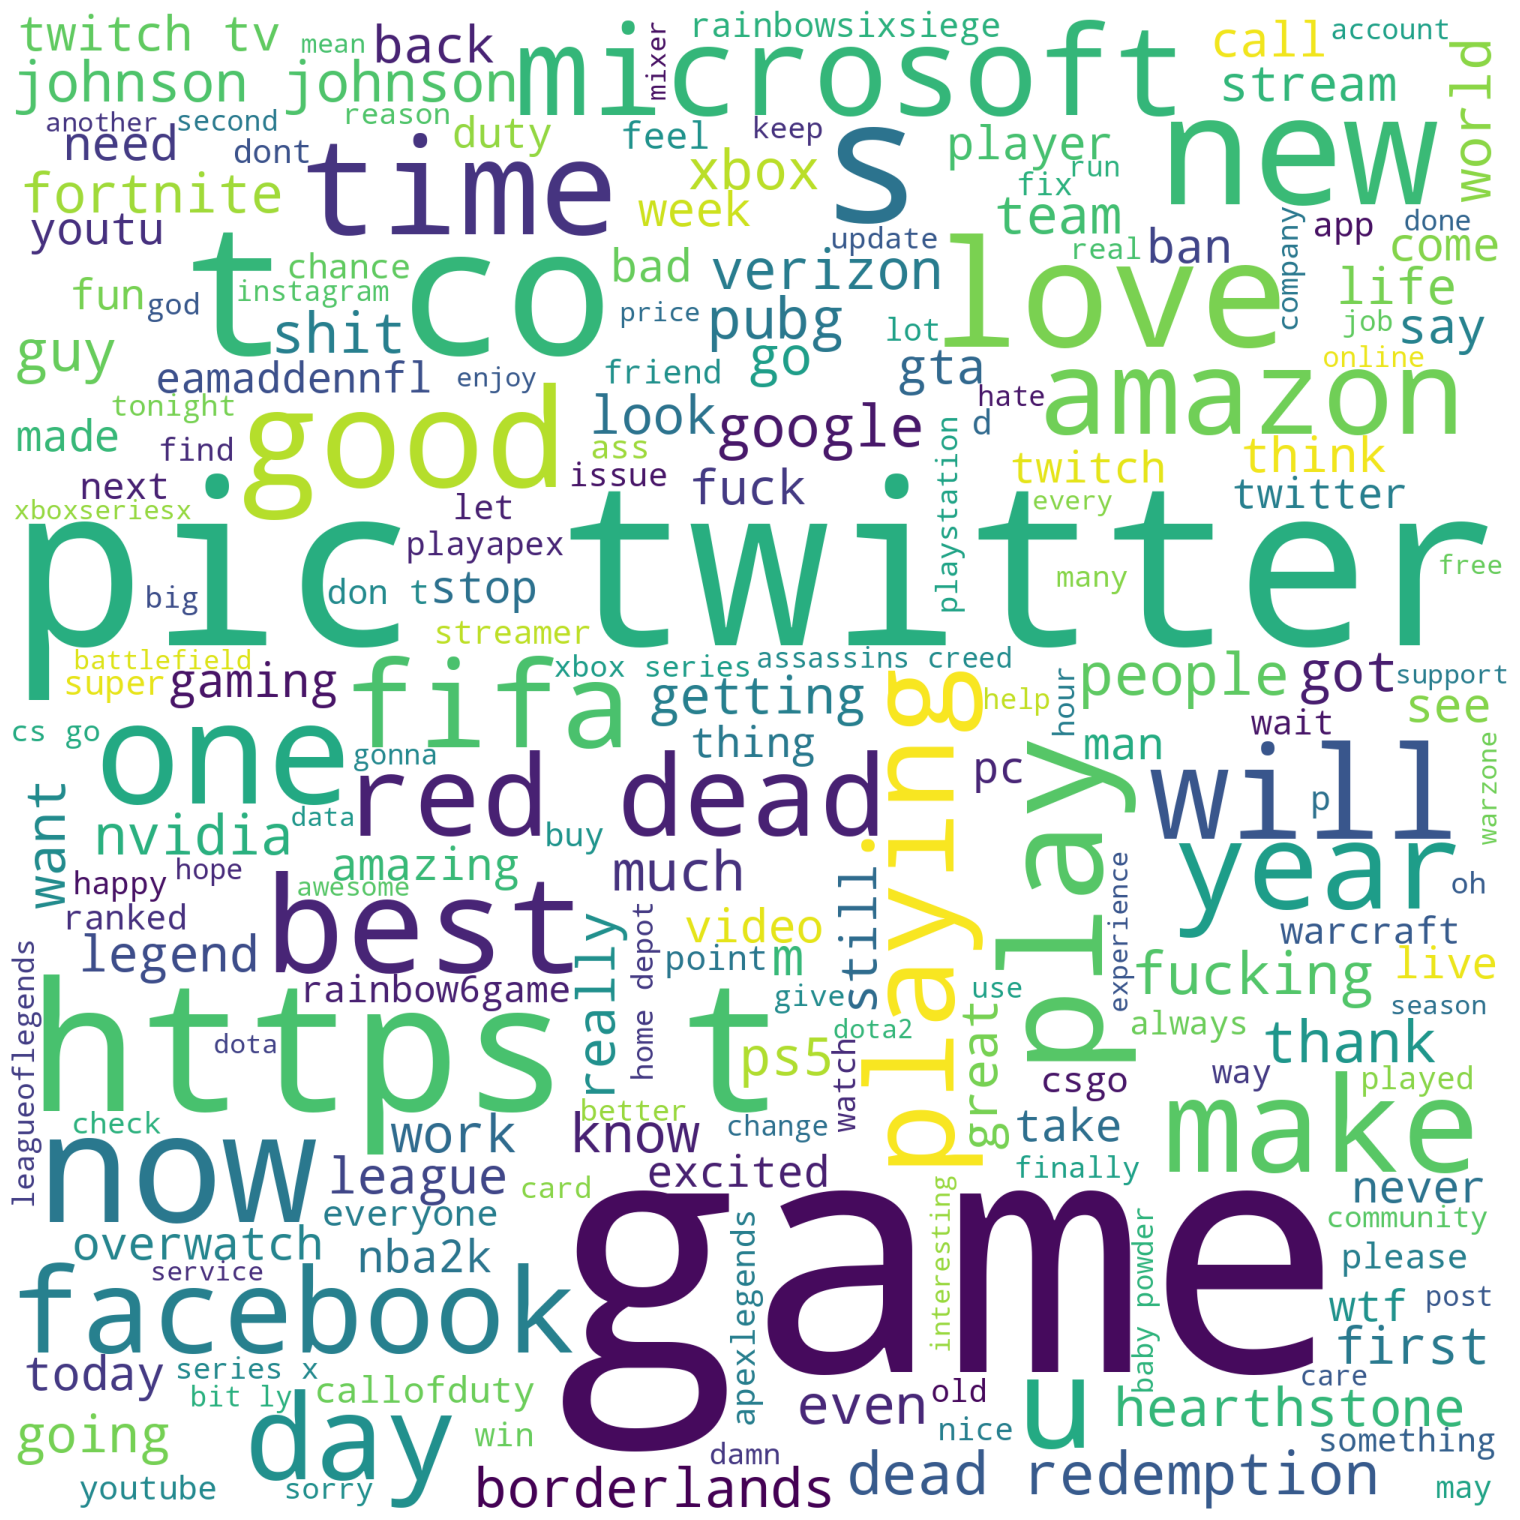

In [77]:
"""
Let's create a wordcloud from the words above.
we will use the wordcloud library.
"""

comment_words_all =""
stopwords_list = set(STOPWORDS)

for x in data["Content"]:
  x=str(x)
  tokens = x.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  comment_words_all += " ".join(tokens)+" "

world_cloud = WordCloud(width=2000, height=2000,
                        background_color="white",
                        stopwords=stopwords_list,
                        min_font_size=20).generate(comment_words_all)
# Plotting the world cloud to an image

plt.figure(figsize=(10,15),facecolor=None)
plt.imshow(world_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()